In [1]:
from preamble import *

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"device: {device}")

device: cuda


In [3]:
df = pd.read_csv('./data/j_before_feature_importance.csv')
data = pd.read_csv('./data/j_before_feature_importance_with_datetime.csv')  # datetime 정보

In [4]:
df.dropna(inplace=True)

In [5]:
df.head()

,temperature,precipitation,wind_speed,humidity,atmospheric_pressure,snow,outflow,inflow,dayofmonth,dayofweek,quarter,month,year,dayofyear,week,hour,minute,second,is_weekend,is_holiday,lag_1h,lag_2h,lag_3h,lag_24h,lag_168h,rolling_3h_avg,rolling_6h_max,rolling_6h_avg,rolling_24h_max,change_rate_1h,rolling_7d_std,delta_24h,daily_range_lag_1d
168,-0.9,0.0,1.7,78.0,1016.8,0.0,114.49,139.29,8,6,1,1,2023,8,1,0,0,0,1,1,114.14,143.45,237.91,130.16,101.05,124.03,258.89,184.47,271.26,3.07e-03,54.58,-0.12,202.75
169,-1.0,0.0,0.9,78.0,1016.9,0.0,127.46,143.82,8,6,1,1,2023,8,1,1,0,0,1,1,114.49,114.14,143.45,82.11,119.92,118.70,237.91,162.56,271.26,1.13e-01,54.56,0.55,165.91
170,-1.5,0.0,1.0,80.0,1017.4,0.0,71.09,102.75,8,6,1,1,2023,8,1,2,0,0,1,1,127.46,114.49,114.14,69.59,124.54,104.35,237.91,134.76,271.26,-4.42e-01,54.89,0.02,165.91
171,-1.7,0.0,1.6,81.0,1018.3,0.0,69.90,93.51,8,6,1,1,2023,8,1,3,0,0,1,1,71.09,127.46,114.49,68.51,80.16,89.48,143.45,106.75,271.26,-1.67e-02,54.98,0.02,165.91
172,-1.9,0.0,1.5,81.0,1018.2,0.0,70.76,93.57,8,6,1,1,2023,8,1,4,0,0,1,1,69.90,71.09,127.46,69.66,104.88,70.58,127.46,94.64,271.26,1.23e-02,55.23,0.02,165.91


In [6]:
X = df.reset_index(drop=True)
y = df['outflow'].values.reshape(-1, 1)

In [7]:
X.head()

,temperature,precipitation,wind_speed,humidity,atmospheric_pressure,snow,outflow,inflow,dayofmonth,dayofweek,quarter,month,year,dayofyear,week,hour,minute,second,is_weekend,is_holiday,lag_1h,lag_2h,lag_3h,lag_24h,lag_168h,rolling_3h_avg,rolling_6h_max,rolling_6h_avg,rolling_24h_max,change_rate_1h,rolling_7d_std,delta_24h,daily_range_lag_1d
0,-0.9,0.0,1.7,78.0,1016.8,0.0,114.49,139.29,8,6,1,1,2023,8,1,0,0,0,1,1,114.14,143.45,237.91,130.16,101.05,124.03,258.89,184.47,271.26,3.07e-03,54.58,-0.12,202.75
1,-1.0,0.0,0.9,78.0,1016.9,0.0,127.46,143.82,8,6,1,1,2023,8,1,1,0,0,1,1,114.49,114.14,143.45,82.11,119.92,118.70,237.91,162.56,271.26,1.13e-01,54.56,0.55,165.91
2,-1.5,0.0,1.0,80.0,1017.4,0.0,71.09,102.75,8,6,1,1,2023,8,1,2,0,0,1,1,127.46,114.49,114.14,69.59,124.54,104.35,237.91,134.76,271.26,-4.42e-01,54.89,0.02,165.91
3,-1.7,0.0,1.6,81.0,1018.3,0.0,69.90,93.51,8,6,1,1,2023,8,1,3,0,0,1,1,71.09,127.46,114.49,68.51,80.16,89.48,143.45,106.75,271.26,-1.67e-02,54.98,0.02,165.91
4,-1.9,0.0,1.5,81.0,1018.2,0.0,70.76,93.57,8,6,1,1,2023,8,1,4,0,0,1,1,69.90,71.09,127.46,69.66,104.88,70.58,127.46,94.64,271.26,1.23e-02,55.23,0.02,165.91


In [8]:
y.shape

(15355, 1)

In [9]:
train_size = int(len(X) * 0.7)

trainset_feature = X[:train_size]
trainset_target = y[:train_size]
testset_feature = X[train_size:]
testset_target = y[train_size:]

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler_feature = MinMaxScaler()
train_feature_scaled = scaler_feature.fit_transform(trainset_feature)
test_feature_scaled = scaler_feature.transform(testset_feature)

scaler_target = MinMaxScaler()
train_target_scaled = scaler_target.fit_transform(trainset_target)
test_target_scaled = scaler_target.transform(testset_target)

In [11]:
valid_size = int(train_feature_scaled.shape[0] * 0.9)

train_feature_scaled2 = train_feature_scaled[:valid_size]
train_target_scaled2 = train_target_scaled[:valid_size]
valid_feature_scaled = train_feature_scaled[valid_size:]
valid_target_scaled = train_target_scaled[valid_size:]

In [12]:
import pickle

with open('./model/scaler_feature_lstm_v10.pkl', 'wb') as f:
  pickle.dump(scaler_feature, f)
with open('./model/scaler_target_lstm_v10.pkl', 'wb') as f:
  pickle.dump(scaler_target, f)

In [13]:
def split_dataset(data, target, seq_len, pred_len):
  X, y = [], []
  for i in range(data.shape[0] - (seq_len + pred_len)):
    X.append(data[i:i + seq_len, :])
    y.append(target[i + seq_len:i + seq_len + pred_len])
  return np.array(X), np.array(y)

In [14]:
seq_len = 168  # 과거 7일 (시간 단위)
pred_len = 1  # 이후 1시간 예측

X_train, y_train = split_dataset(train_feature_scaled2, train_target_scaled2, seq_len, pred_len)
X_valid, y_valid = split_dataset(valid_feature_scaled, valid_target_scaled, seq_len, pred_len)
X_test, y_test = split_dataset(test_feature_scaled, test_target_scaled, seq_len, pred_len)

print(X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape)

(9504, 168, 33) (906, 168, 33) (4438, 168, 33) (9504, 1, 1) (906, 1, 1) (4438, 1, 1)


In [15]:
from torch.utils.data import DataLoader, TensorDataset

# batch_size = 128
X_train_tensor, y_train_tensor = torch.tensor(X_train).float(), torch.tensor(y_train).float()
X_valid_tensor, y_valid_tensor = torch.tensor(X_valid).float(), torch.tensor(y_valid).float()
X_test_tensor, y_test_tensor = torch.tensor(X_test).float(), torch.tensor(y_test).float()

loader_train = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), shuffle=True,
                                           batch_size=128)
loader_valid = DataLoader(TensorDataset(X_valid_tensor, y_valid_tensor), shuffle=True,
                                           batch_size=128)
loader_test = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), shuffle=False,
                                          batch_size=128)

In [16]:
class LSTMModel(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(LSTMModel, self).__init__()
    self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
    self.fc = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    lstm_out, _ = self.lstm(x)
    last_out = lstm_out[:, -1, :]
    out = self.fc(last_out)
    return out

input_size = X_train.shape[2]
hidden_size = 50
output_size = pred_len

model = LSTMModel(input_size, hidden_size, output_size).to(device)
print(model)

LSTMModel(
  (lstm): LSTM(33, 50, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)


In [17]:
import torch.optim as optim

loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [18]:
def evaluate(model, valid_dataset, loss_fn, device):
  val_loss = 0
  model.eval()
  with torch.no_grad():
    for X, y in valid_dataset:
      X_batch, y_batch = X.to(device), y.to(device)
      out = model(X_batch)
      loss = loss_fn(out, y_batch)
      val_loss += loss.item()
  return val_loss

In [19]:
num_epochs = 300
best_valid_loss = float('inf')
loss_history = []
model.to(device)

for epoch in range(num_epochs):
  model.train() 
  train_loss = 0
  for X, y in loader_train:
    X_batch, y_batch = X.to(device), y.to(device)

    out = model(X_batch)
    loss = loss_fn(out, y_batch)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss += loss.item()

  loss_history.append(train_loss / len(loader_train.dataset))
  valid_loss = evaluate(model, loader_valid, loss_fn, device)
  print(f'Epoch : {epoch + 1} / {num_epochs}')
  print(f'Train Loss : {train_loss}')
  print(f'Valid Loss : {valid_loss}')
  if valid_loss < best_valid_loss:
    best_valid_loss = valid_loss
    torch.save(model.state_dict(), './model/1hour_best_lstm_model_v10.pt')

c:\DevTool\anaconda3\envs\torch_book\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([128, 1, 1])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\DevTool\anaconda3\envs\torch_book\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([32, 1, 1])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\DevTool\anaconda3\envs\torch_book\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([10, 1, 1])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. 

Epoch : 1 / 300
Train Loss : 3.1107339709997177
Valid Loss : 0.3243615999817848
Epoch : 2 / 300
Train Loss : 2.9146366864442825
Valid Loss : 0.29865297861397266
Epoch : 3 / 300
Train Loss : 2.909324537962675
Valid Loss : 0.29752950742840767
Epoch : 4 / 300
Train Loss : 2.9156761448830366
Valid Loss : 0.29379258677363396
Epoch : 5 / 300
Train Loss : 2.9159330930560827
Valid Loss : 0.3009406179189682
Epoch : 6 / 300
Train Loss : 2.886916758492589
Valid Loss : 0.28470670618116856
Epoch : 7 / 300
Train Loss : 2.9002115465700626
Valid Loss : 0.30375029519200325
Epoch : 8 / 300
Train Loss : 2.8981958460062742
Valid Loss : 0.3095659129321575
Epoch : 9 / 300
Train Loss : 2.897349376231432
Valid Loss : 0.31592901423573494
Epoch : 10 / 300
Train Loss : 2.9056360069662333
Valid Loss : 0.29957837983965874
Epoch : 11 / 300
Train Loss : 2.9118501506745815
Valid Loss : 0.314741138368845
Epoch : 12 / 300
Train Loss : 2.91582147218287
Valid Loss : 0.33003687486052513
Epoch : 13 / 300
Train Loss : 2.902

In [20]:
model.load_state_dict(torch.load('./model/1hour_best_lstm_model_v10.pt'))
model.to(device)

C:\Users\user\AppData\Local\Temp\ipykernel_24692\166687347.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('./model/1hour_best_lstm_mode

LSTMModel(
  (lstm): LSTM(33, 50, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

In [21]:
model.eval()

y_pred_list = []
with torch.no_grad():
  for X_batch, _ in loader_test:
    X_batch = X_batch.to(device)
    y_pred = model(X_batch).cpu().numpy()
    print(y_pred)
    y_pred_list.append(y_pred)

y_pred = np.concatenate(y_pred_list, axis=0)

[[0.371]
 [0.37 ]
 [0.37 ]
 [0.369]
 [0.368]
 [0.367]
 [0.367]
 [0.367]
 [0.368]
 [0.367]
 [0.368]
 [0.368]
 [0.369]
 [0.37 ]
 [0.369]
 [0.37 ]
 [0.369]
 [0.368]
 [0.367]
 [0.368]
 [0.369]
 [0.37 ]
 [0.37 ]
 [0.369]
 [0.369]
 [0.368]
 [0.369]
 [0.368]
 [0.368]
 [0.368]
 [0.368]
 [0.367]
 [0.365]
 [0.364]
 [0.367]
 [0.368]
 [0.368]
 [0.37 ]
 [0.37 ]
 [0.37 ]
 [0.369]
 [0.369]
 [0.369]
 [0.368]
 [0.368]
 [0.37 ]
 [0.369]
 [0.37 ]
 [0.37 ]
 [0.37 ]
 [0.37 ]
 [0.37 ]
 [0.369]
 [0.367]
 [0.366]
 [0.367]
 [0.367]
 [0.367]
 [0.369]
 [0.371]
 [0.37 ]
 [0.37 ]
 [0.369]
 [0.37 ]
 [0.37 ]
 [0.369]
 [0.367]
 [0.367]
 [0.367]
 [0.367]
 [0.368]
 [0.369]
 [0.369]
 [0.369]
 [0.368]
 [0.368]
 [0.367]
 [0.367]
 [0.366]
 [0.367]
 [0.367]
 [0.368]
 [0.368]
 [0.369]
 [0.369]
 [0.37 ]
 [0.369]
 [0.369]
 [0.368]
 [0.368]
 [0.37 ]
 [0.369]
 [0.37 ]
 [0.369]
 [0.369]
 [0.369]
 [0.368]
 [0.368]
 [0.367]
 [0.367]
 [0.367]
 [0.368]
 [0.367]
 [0.367]
 [0.368]
 [0.368]
 [0.369]
 [0.37 ]
 [0.369]
 [0.37 ]
 [0.368]
 

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

y_test_ori = scaler_target.inverse_transform(y_test.reshape(-1, 1))
y_pred_ori = scaler_target.inverse_transform(y_pred)

rmse = np.sqrt(mean_squared_error(y_test_ori, y_pred_ori))
r2 = r2_score(y_test_ori, y_pred_ori)
mape = mean_absolute_percentage_error(y_test_ori, y_pred_ori)
print(f'Test RMSE: {rmse:.4f}')
print(f'Test MAPE: {mape:.4f}%')
print(f'Test R-squared: {r2:.4f}')

Test RMSE: 56.1231
Test MAPE: 33.6666%
Test R-squared: -0.0145


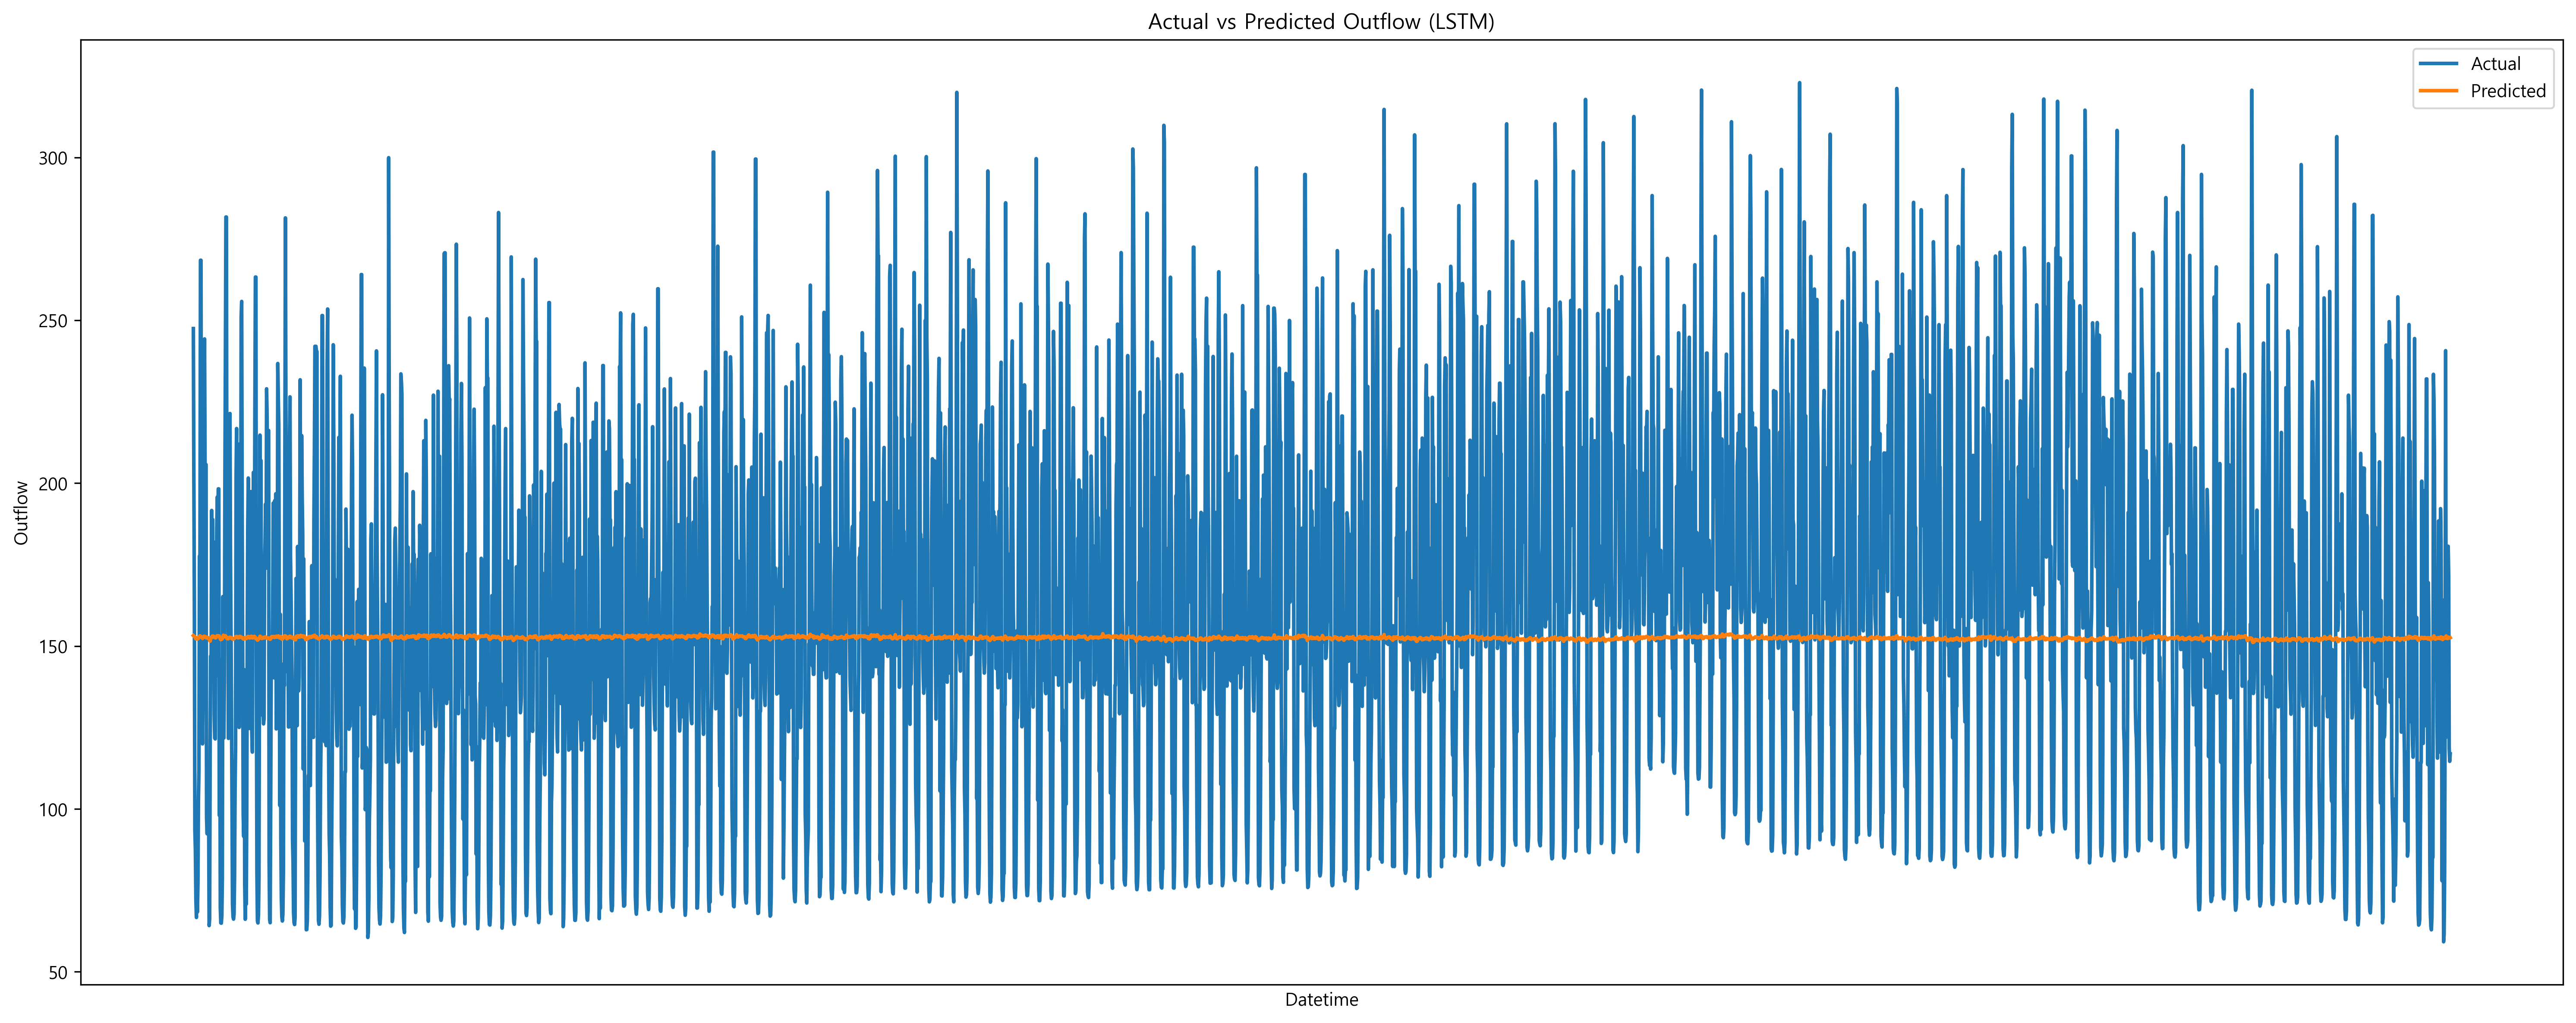

In [23]:
plt.figure(figsize=(20, 8))

start_index = train_size + seq_len
end_index = start_index + len(y_test)

datetime_range = data['datetime'][start_index:end_index].values
# if len(datetime_range) < len(y_pred):
#   print("Warning: Datetime range is shorter than prediction length. Adjusting range.")
#   y_pred = y_pred[:len(da/tetime_range)]

plt.plot(datetime_range, y_test_ori, label='Actual')
plt.plot(datetime_range, y_pred_ori, label='Predicted')

plt.xticks([])
plt.xlabel('Datetime')
plt.ylabel('Outflow')
plt.title('Actual vs Predicted Outflow (LSTM)')
plt.legend()
plt.tight_layout()
plt.show()

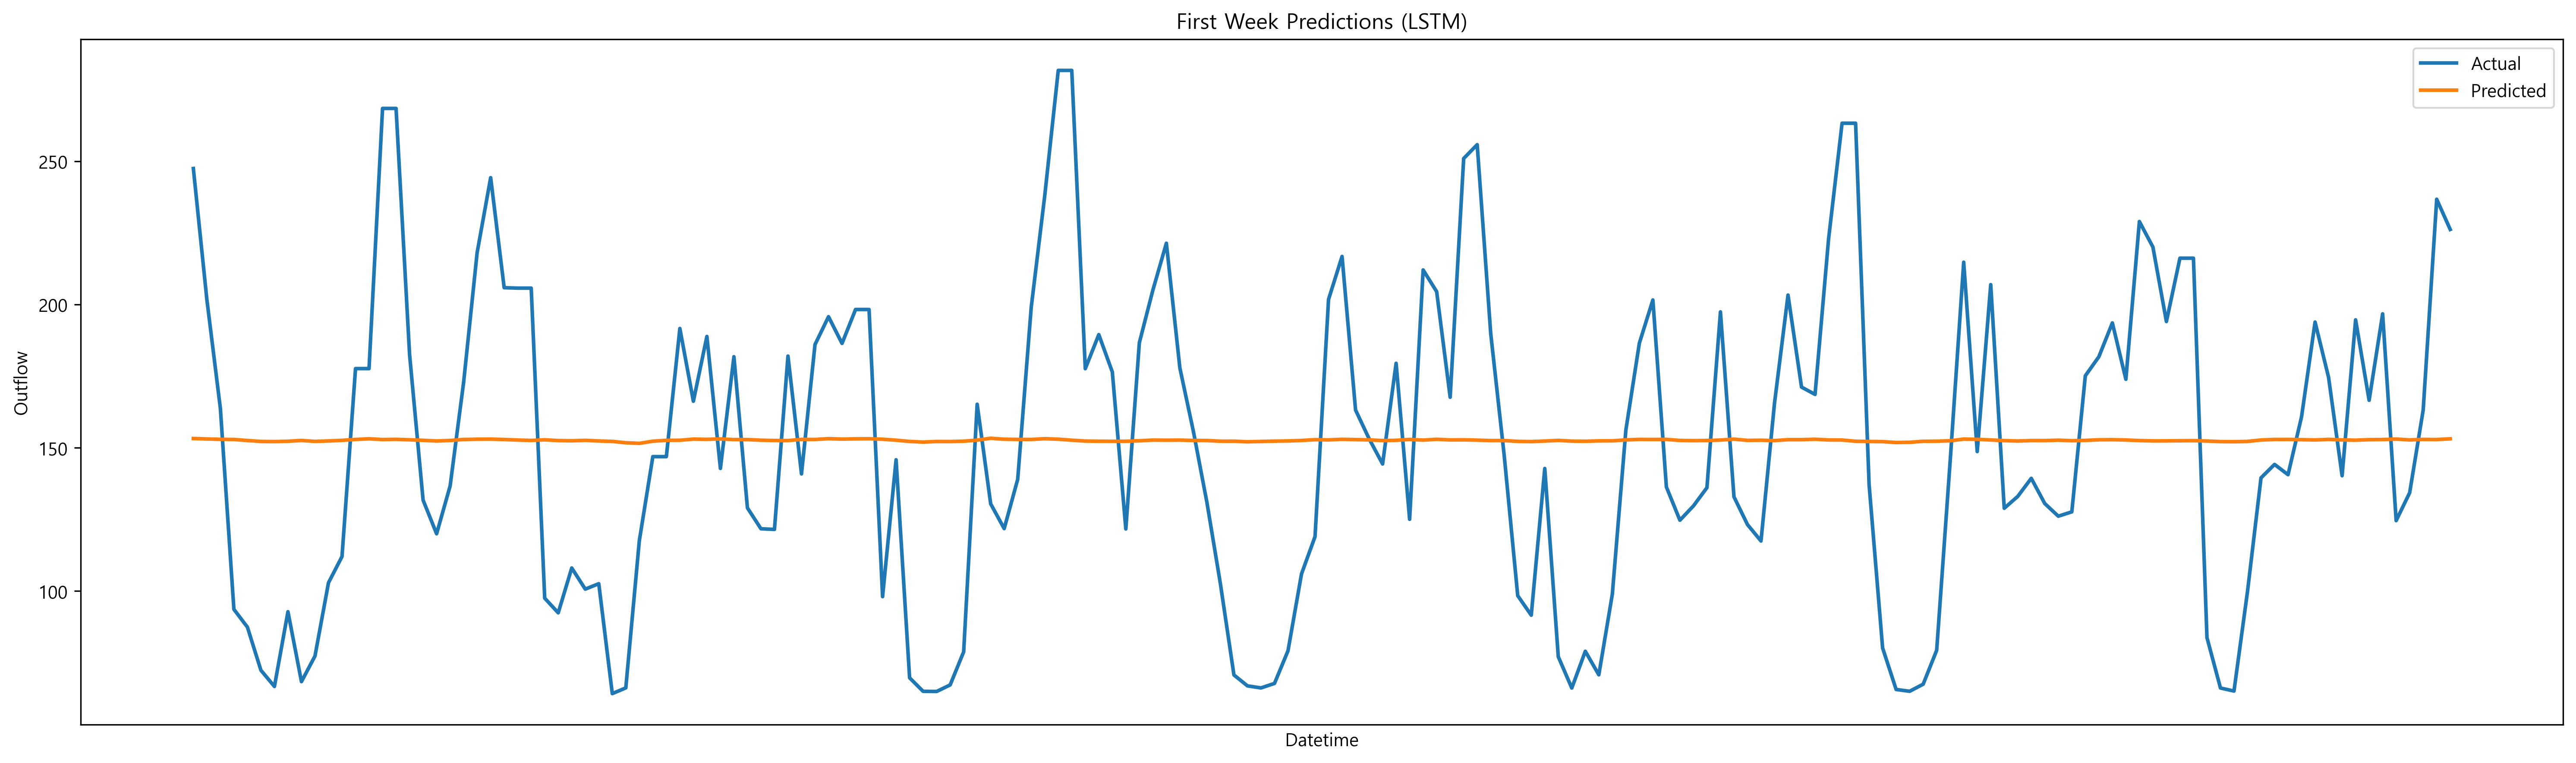

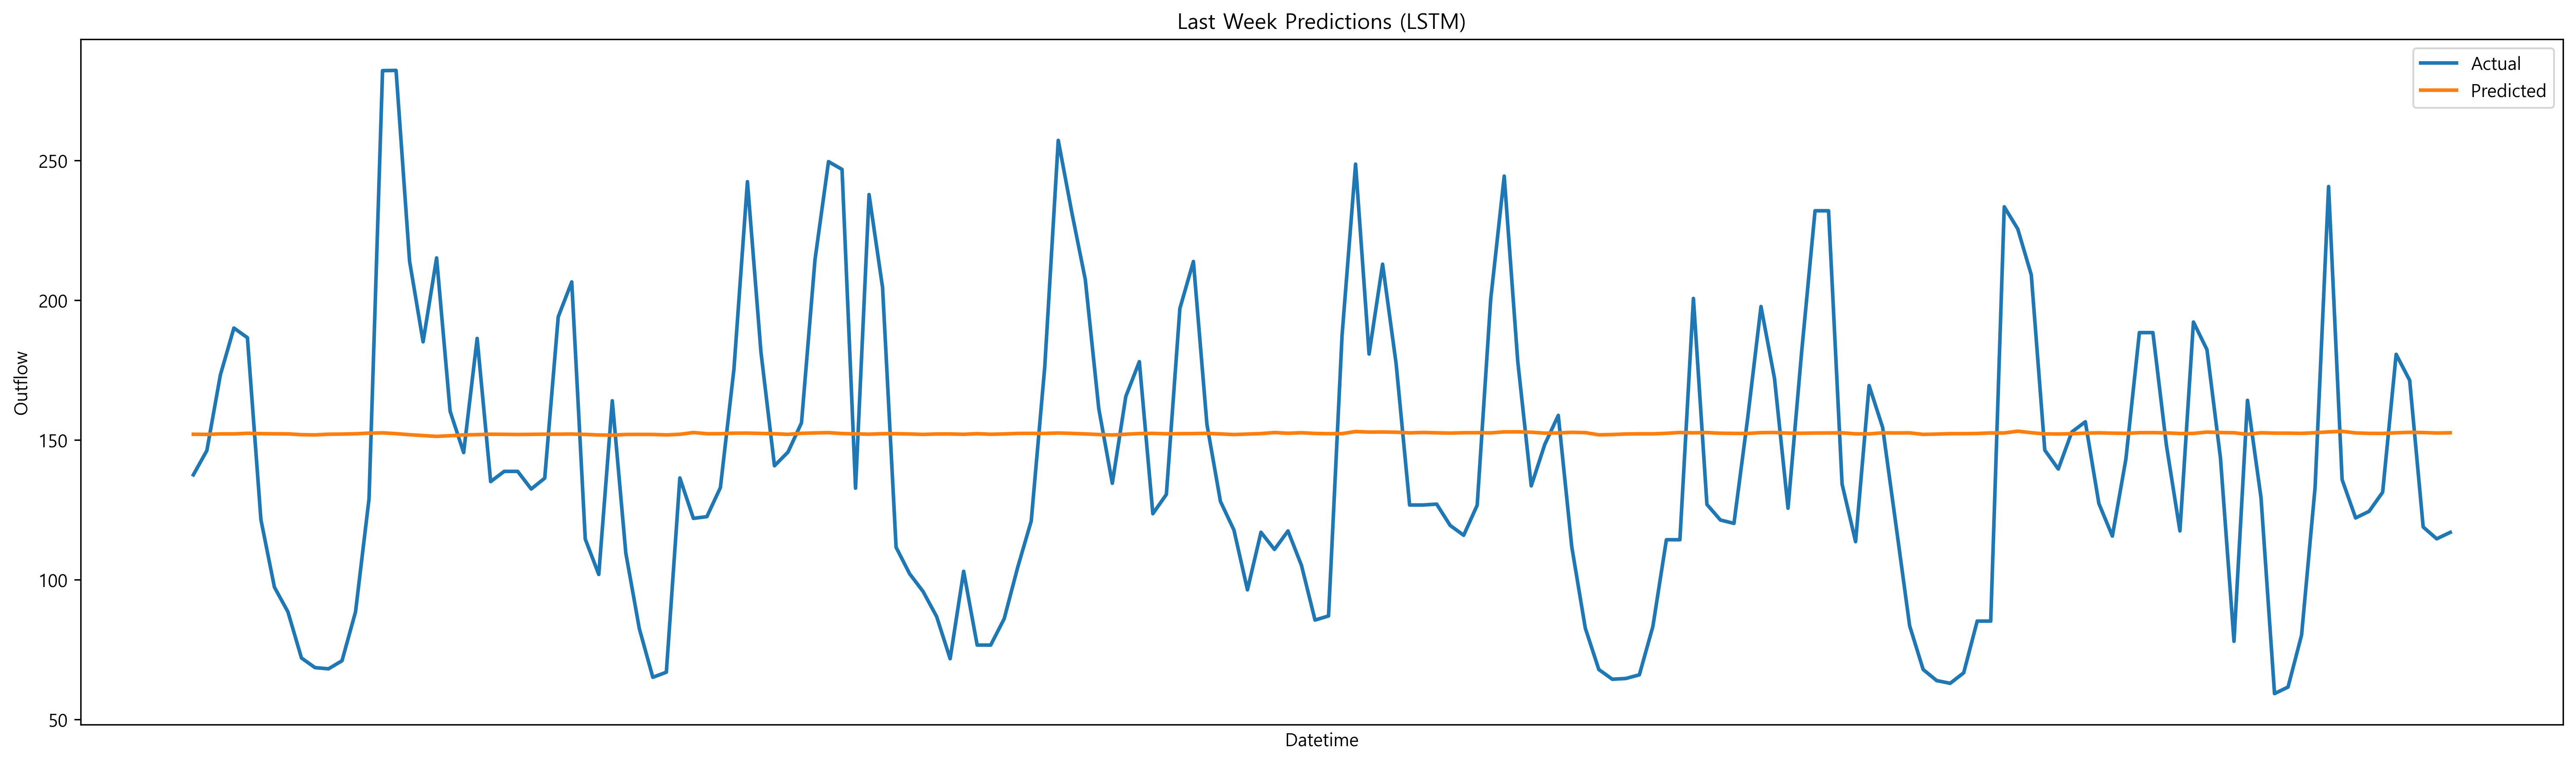

In [24]:
def plot_predictions_weekly(y_true, y_pred, datetime_data, start_index, plot_title):
  plt.figure(figsize=(20, 6))

  datetime_range = datetime_data[start_index:start_index + 168].values  # 일주일 (168시간)

  y_true_plot = y_true[:168]
  y_pred_plot = y_pred[:168]

  plt.plot(datetime_range, y_true_plot, label='Actual')
  plt.plot(datetime_range, y_pred_plot, label='Predicted')

  plt.xlabel('Datetime')
  plt.ylabel('Outflow')
  plt.title(plot_title)
  plt.legend()
  plt.xticks([])
  plt.tight_layout()
  plt.show()

start_index_start = train_size + seq_len
plot_predictions_weekly(y_test_ori, y_pred_ori, data['datetime'], start_index_start, 'First Week Predictions (LSTM)')

start_index_end = train_size + seq_len + len(y_test) - 168
plot_predictions_weekly(y_test_ori[-168:], y_pred_ori[-168:], data['datetime'], len(data) - 168, 'Last Week Predictions (LSTM)')